This is a notebook for putting all of the project into one place. 
This is where we should be testing and training our models as well as putting
together the final result. 

In [1]:
#Import all necessary packages

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras

#from tensorflow.python.keras import layers
#from tensorflow.python.keras.layers import Dense, Flatten
#from tensorflow.python.keras.models import Sequential
#from tensorflow.keras.optimizers import Adam

2022-11-28 15:14:13.066369: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".
2022-11-28 15:14:13.271765: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.


Metal device set to: Apple M2

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-11-28 15:14:13.271903: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-11-28 15:14:13.314762: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


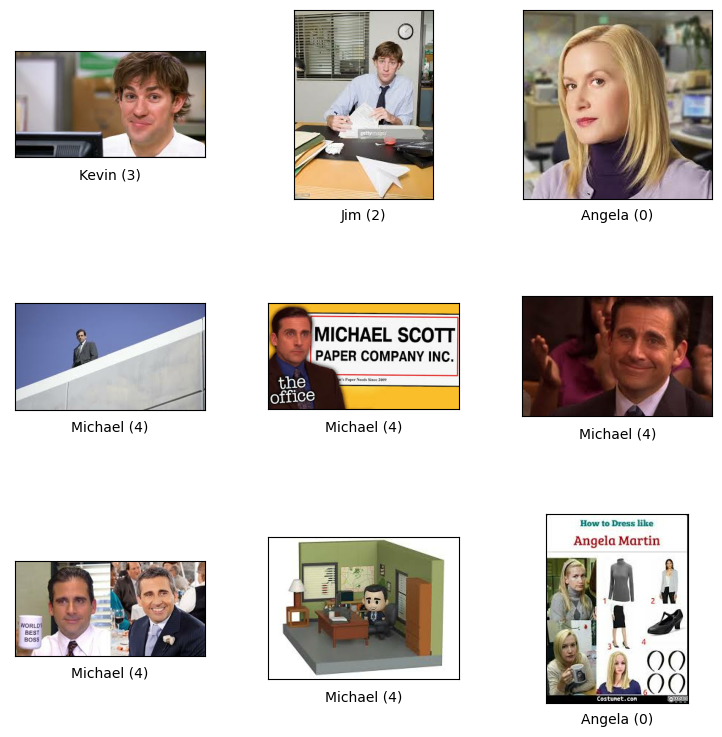

In [2]:
#Import the data for character classification
import preprocessing
from preprocessing import get_characters

#Set file path as your directory to the folder containing Office Image dataset, and show examples
file_path = '../data/characters/'
#X0, Y0, X1, Y1, D0, D1= get_characters(file_path)
train_ds, test_ds = get_characters(file_path)


#from keras.applications.res_net50 import preprocess_input


In [3]:
print("The shape of our training images is ", np.shape(train_ds))#), " with label shape ", np.shape(Y0))
print("The shape of our testing images is ", np.shape(test_ds))#, " with label shape ", np.shape(Y1))

The shape of our training images is  ()
The shape of our testing images is  ()


In [4]:
import recognition
from recognition import get_resnet

#Get Pretrained Resnet Model with a few extra layers for additional training
#This is pretrained on ImageNet

resnet_model = get_resnet()

In [5]:
#Train the new model with our data
#resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy']) 
resnet_model.compile(
        loss="categorical_crossentropy",  ## do not change loss/metrics
        metrics=["categorical_accuracy"],
        optimizer= keras.optimizers.Adam(learning_rate = 0.002),  ## feel free to change

    )

#View the layers of the pretrained model (View trainable versus non-trainable)
resnet_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1)                 2049  

In [6]:
#Fit the model to our data

#history = resnet_model.fit(D0, epochs=10) #Add back in validation data between D0 and epochs: validation_data=val_ds and batch size
#Making validation data

history = resnet_model.fit(
    train_ds,
    epochs          = 10
    #batch_size      = batch_size,
    #validation_data = (X1_sub, Y1_sub),
)

Epoch 1/10


2022-11-28 15:14:16.285692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 18s 399ms/step - loss: 2.0833e-07 - categorical_accuracy: 1.0000
Epoch 2/10
40/40 [==============================] - 15s 384ms/step - loss: 2.0833e-07 - categorical_accuracy: 1.0000
Epoch 3/10
40/40 [==============================] - 15s 379ms/step - loss: 2.0833e-07 - categorical_accuracy: 1.0000
Epoch 4/10
40/40 [==============================] - 15s 378ms/step - loss: 2.0833e-07 - categorical_accuracy: 1.0000
Epoch 5/10
40/40 [==============================] - 15s 371ms/step - loss: 2.0833e-07 - categorical_accuracy: 1.0000
Epoch 6/10
40/40 [==============================] - 16s 389ms/step - loss: 2.0833e-07 - categorical_accuracy: 1.0000
Epoch 7/10
40/40 [==============================] - 16s 395ms/step - loss: 2.0833e-07 - categorical_accuracy: 1.0000
Epoch 8/10
40/40 [==============================] - 15s 378ms/step - loss: 2.0833e-07 - categorical_accuracy: 1.0000
Epoch 9/10
40/40 [==============================] - 15s 378ms/step - loss: 

In [7]:
#Model evaluation:

fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

KeyError: 'accuracy'

<Figure size 640x480 with 0 Axes>